In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Introduction

In [3]:
#analyzing test scores by gender, parental education, and other demographics

The data set that I chose to work with for this project is from kaggle. It has information on student test scores and their corresponding demographics. While I will be looking at a variety of potential questions to complete this project, my main question is: How does the performance of female and male students compare?

# Pandas I-III

In [5]:
students=pd.read_csv("StudentsPerformance.csv")
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [6]:
students.shape

(1000, 8)

In [7]:
female_students=(students["gender"]=="female")
females=students[female_students]
females

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [8]:
male_students=(students["gender"]=="male")
males=students[male_students]
males

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
10,male,group C,associate's degree,standard,none,58,54,52
...,...,...,...,...,...,...,...,...
985,male,group A,high school,standard,none,57,51,54
987,male,group E,some high school,standard,completed,81,75,76
990,male,group E,high school,free/reduced,completed,86,81,75
994,male,group A,high school,standard,none,63,63,62


# Data Cleaning and EDA

In [17]:
students=students.dropna()
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


No missing values

In [20]:
females=females.dropna()
females

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [22]:
males=males.dropna()
males

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
10,male,group C,associate's degree,standard,none,58,54,52
...,...,...,...,...,...,...,...,...
985,male,group A,high school,standard,none,57,51,54
987,male,group E,some high school,standard,completed,81,75,76
990,male,group E,high school,free/reduced,completed,86,81,75
994,male,group A,high school,standard,none,63,63,62


In [24]:
students.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [26]:
females.describe()

,math score,reading score,writing score
count,518.000000,518.000000,518.000000
mean,63.633205,72.608108,72.467181
std,15.491453,14.378245,14.844842
min,0.000000,17.000000,10.000000
25%,54.000000,63.250000,64.000000
50%,65.000000,73.000000,74.000000
75%,74.000000,83.000000,82.000000
max,100.000000,100.000000,100.000000


In [28]:
males.describe()

,math score,reading score,writing score
count,482.000000,482.000000,482.000000
mean,68.728216,65.473029,63.311203
std,14.356277,13.931832,14.113832
min,27.000000,23.000000,15.000000
25%,59.000000,56.000000,53.000000
50%,69.000000,66.000000,64.000000
75%,79.000000,75.000000,73.750000
max,100.000000,100.000000,100.000000


# Regular Expressions

In [32]:
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [66]:
withoutGroup=students['race/ethnicity'].str.replace("group", " ")
withoutGroup

0        B
1        C
2        B
3        A
4        C
      ... 
995      E
996      C
997      C
998      D
999      D
Name: race/ethnicity, Length: 1000, dtype: object

In [70]:
students['race/ethnicity']=withoutGroup

In [73]:
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,female
0,female,B,bachelor's degree,standard,none,72,72,74,1
1,female,C,some college,standard,completed,69,90,88,1
2,female,B,master's degree,standard,none,90,95,93,1
3,male,A,associate's degree,free/reduced,none,47,57,44,0
4,male,C,some college,standard,none,76,78,75,0
...,...,...,...,...,...,...,...,...,...
995,female,E,master's degree,standard,completed,88,99,95,1
996,male,C,high school,free/reduced,none,62,55,55,0
997,female,C,high school,free/reduced,completed,59,71,65,1
998,female,D,some college,standard,completed,68,78,77,1


# Visualization I & II

Text(0, 0.5, 'Number of Students')

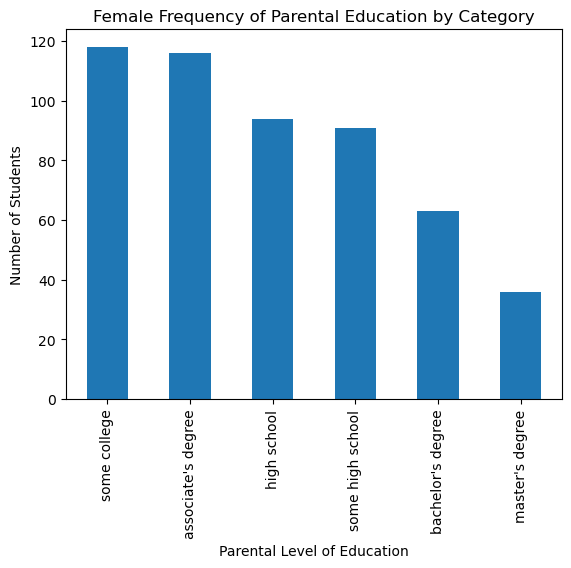

In [39]:
females['parental level of education'].value_counts().plot(kind='bar')

plt.title('Female Frequency of Parental Education by Category')
plt.xlabel('Parental Level of Education')
plt.ylabel('Number of Students')

Text(0, 0.5, 'Number of Students')

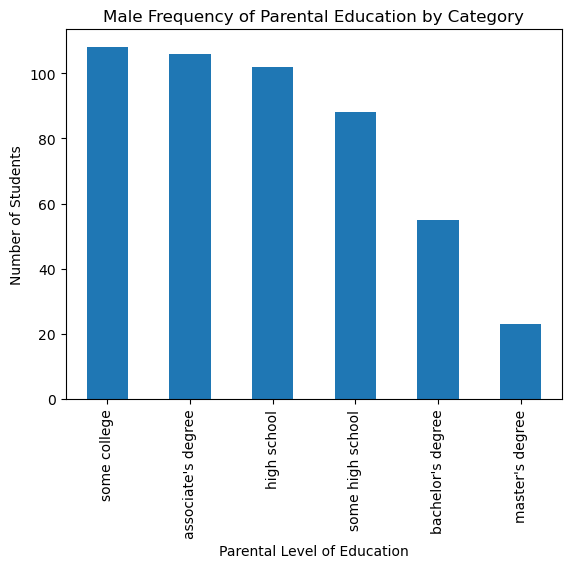

In [40]:
males['parental level of education'].value_counts().plot(kind='bar')

plt.title('Male Frequency of Parental Education by Category')
plt.xlabel('Parental Level of Education')
plt.ylabel('Number of Students')

Text(0, 0.5, 'Number of Students')

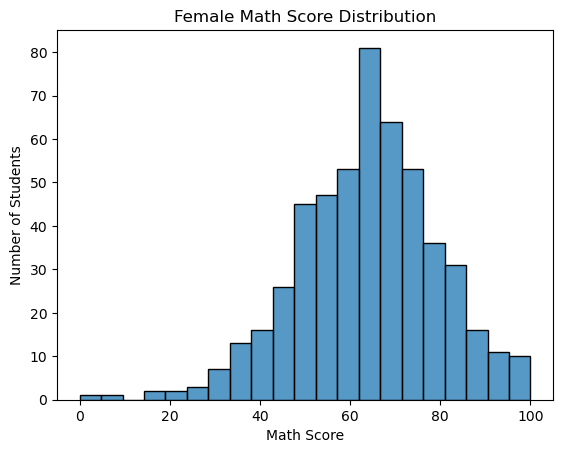

In [43]:
sns.histplot(data=females, x="math score")

plt.title('Female Math Score Distribution')
plt.xlabel('Math Score')
plt.ylabel('Number of Students')

Text(0, 0.5, 'Number of Students')

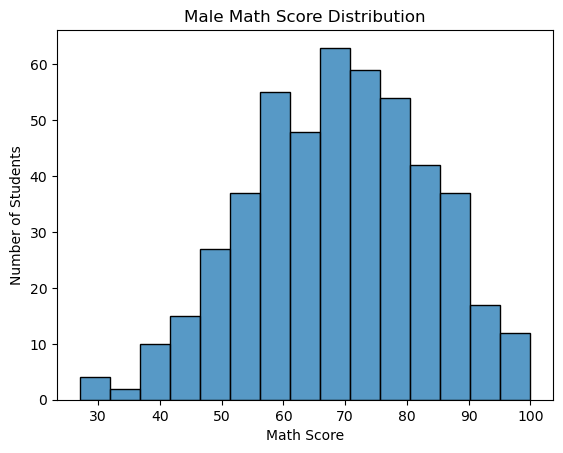

In [45]:
sns.histplot(data=males, x="math score")

plt.title('Male Math Score Distribution')
plt.xlabel('Math Score')
plt.ylabel('Number of Students')

Text(0, 0.5, 'Writing Score')

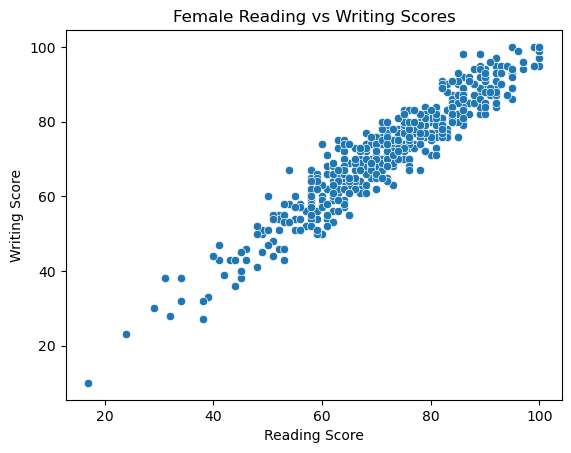

In [47]:
sns.scatterplot(data=females, x="reading score",y="writing score")

plt.title('Female Reading vs Writing Scores')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')

Text(0, 0.5, 'Writing Score')

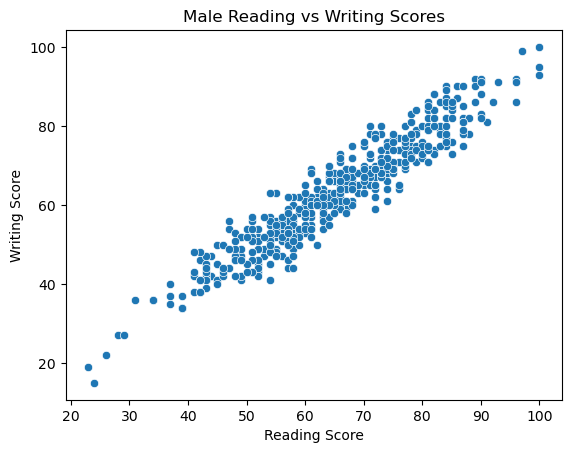

In [49]:
sns.scatterplot(data=males, x="reading score",y="writing score")

plt.title('Male Reading vs Writing Scores')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')

Text(0, 0.5, 'Math Score')

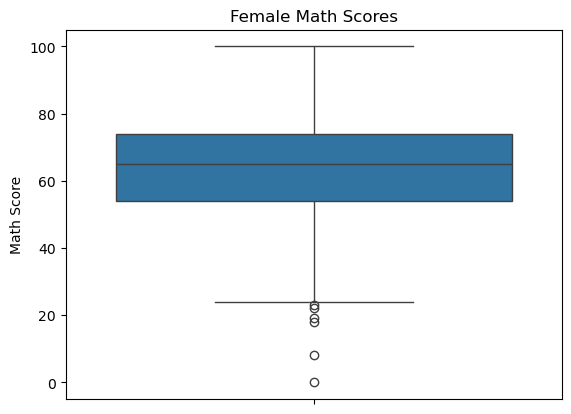

In [51]:
sns.boxplot(data=females, y="math score")

plt.title('Female Math Scores')
plt.ylabel('Math Score')

Text(0, 0.5, 'Math Score')

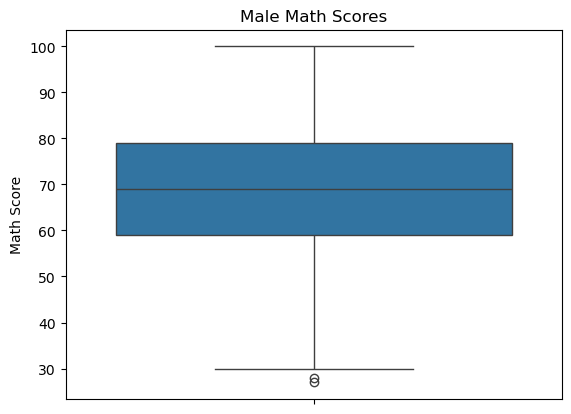

In [53]:
sns.boxplot(data=males, y="math score")

plt.title('Male Math Scores')
plt.ylabel('Math Score')

# Sampling

In [56]:
students['female']=(students['gender']=='female').astype(int)

In [58]:
actual_students=np.mean(students["female"])
actual_students

0.518

In [60]:
n=800
random_sample=students.sample(n,replace=False)
sample_students= np.mean(random_sample["female"])
err=abs(sample_students-actual_students)/actual_students

from IPython.display import Markdown
Markdown(f"**Actual**={actual_students:.4f}, **Sample**={sample_students:.4f}, "
         f"**Err**={100*err:.2f}%.")

**Actual**=0.5180, **Sample**=0.5062, **Err**=2.27%.

# Modeling & SLR

Mean Squared Error: 20.407781911559294
R-squared: 0.9078349198128168


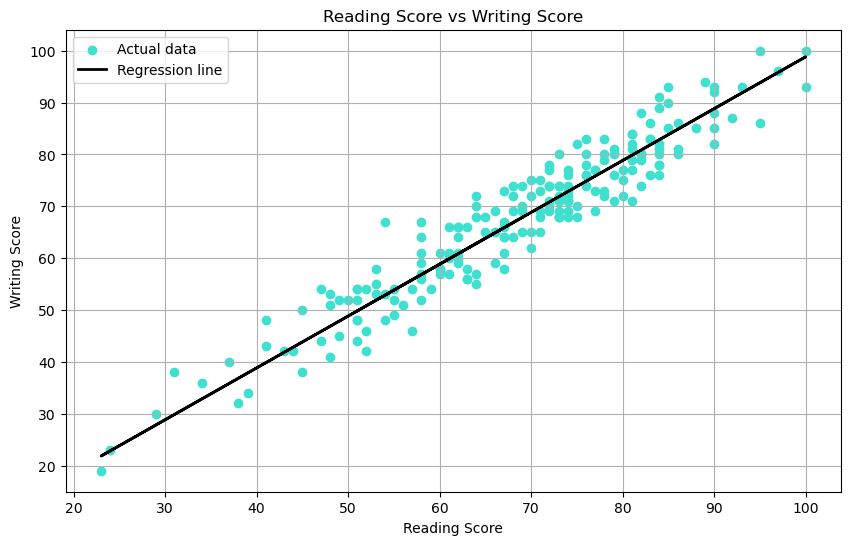

In [63]:
X = students[['reading score']] 
y = students['writing score']       
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = np.mean((y_test - y_pred)**2)
r_squared = model.score(X_test, y_test)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

plt.figure(figsize=(10,6))


plt.scatter(X_test, y_test, color='turquoise', label='Actual data')


plt.plot(X_test, y_pred, color='black', linewidth=2, label='Regression line')


plt.title('Reading Score vs Writing Score')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.legend()

plt.grid(True)
plt.show()